The following recipe illustrates how to simulate mercury intrusion porosimetry on an image using the ``porosimetry`` filter.  The PoreSpy implementation is equivalent to 'morphological image opening' of [Hilpert et al](https://www.sciencedirect.com/science/article/pii/S0309170800000567?via%3Dihub).  PoreSpy's implementation uses distance transforms instead of morphological operations so it is generally faster, especially for larger sphere sizes since binary opening slows down with larger structuring elements.

## Import packages

In [1]:
import porespy as ps
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()

## Create image and variables

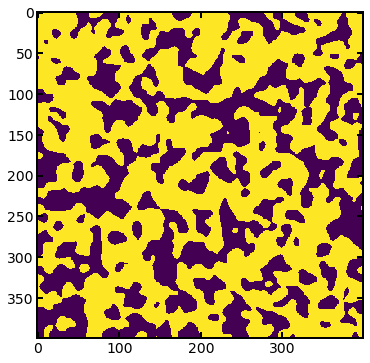

In [2]:
im = ps.generators.blobs(shape=[400, 400], porosity=0.6, blobiness=2)
plt.figure(figsize=[6, 6])
plt.imshow(im)
plt.show();

## Apply filter function

### access_limited

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

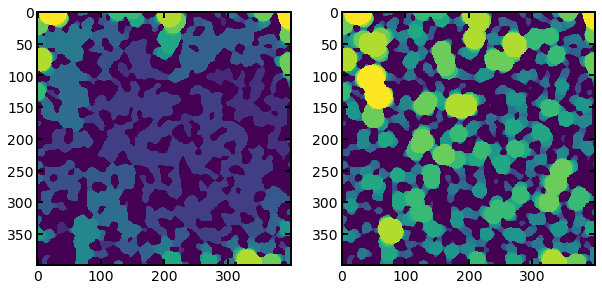

In [3]:
mip = ps.filters.porosimetry(im, access_limited=True)
local_t = ps.filters.porosimetry(im, access_limited=False)
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.imshow(mip)
plt.subplot(1, 2, 2)
plt.imshow(local_t)
plt.show();

Finally, the images produced by the filter can be passed to the ``pore_size_distribution`` function in the ``metrics`` module to produce numerical data of the pore volume vs. sphere radius:

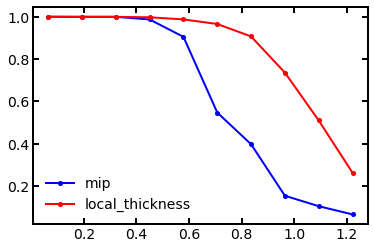

In [4]:
mip_data = ps.metrics.pore_size_distribution(mip)
local_t_data = ps.metrics.pore_size_distribution(local_t)
plt.figure(figsize=[6, 4])
plt.plot(mip_data.LogR, mip_data.cdf, 'b.-', label='mip')
plt.plot(local_t_data.LogR, local_t_data.cdf, 'r.-', label='local_thickness')
plt.legend()
plt.show();